<a href="https://colab.research.google.com/github/fabiollg/PI-4_Predicao_Valores_Imoveis_SJC/blob/main/PI_4_Predicao_Valores_Imoveis_SJC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>PROJETO INTEGRADOR 4 - PREDIÇÃO DE VALORES DE ALUGUÉIS DE IMÓVEIS EM SÃO JOSÉ DOS CAMPOS</b>

#### <li><b>Objetivo:</b> Efetuar um protótipo de um aplicativo que consiga estimar de forma automática, através de aprendizado de máquinas, com boa precisão (erro < 15%), o valor do aluguel de um determinado imóvel em São José dos Campos de forma a auxiliar os envolvidos na negociação (proprietário e inquilino).
#### <li><b>Dados Iniciais:</b>
#### a) Dados com valores de aluguéis de imóveis da cidade de São José dos Campos obtidos a partir do 2º semestre de 2021 e ao longo de 2022. 
#### b) Tabela do IBGE correlacionando os CEPs de todo o Brasil com os endereços dos imóveis e com suas coordenadas geográficas.

In [1]:
# Instalando bibliotecas para possibilitar o trabalho com dataframes.
%pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
%pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Importando as bibliotecas a serem utilizadas.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<hr>

# <b>1) Identificação e Tratamento Inicial dos Dados</b>

### <li><font color="#800080">Carregando dados, com o preço de aluguéis e características dos imóveis, do arquivo "listings.zip":</font>

In [4]:
url_dados = 'https://github.com/fabiollg/PI-4_Predicao_Valores_Imoveis_SJC/blob/main/dados/new-listings.zip?raw=true'
dados = pd.read_csv(url_dados,compression='zip')

<ipython-input-4-0e643d9e3a75>:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(url_dados,compression='zip')


### <li><font color="#800080">Visualizando todas as colunas para identificar todos os atributos disponíveis e a possibilidade de filtrá-los:</font>

In [5]:
pd.set_option('display.max_columns',None)
display(dados.head(3))

,id,resource_id,provider_id,advertiser_id,address_country,address_state,address_city,address_neighborhood,address_street_number,address_street,address_unit_number,address_zipcode,latitude,longitude,title,description,unit_type,amenities,bathrooms,bedrooms,suites,parking_spaces,total_area,usable_area,price,price_monthly_condo_fee,price_rental_total,price_yearly_iptu,publication_type,listing_status,listing_type,created_at,updated_at,raw_data,scraped_at
0,923833,2539419421,61529.0,8132d7f5-ac6e-8229-ac29-66e53d55fe1e,BR,São Paulo,São José dos Campos,Jardim das Indústrias,NaN,NaN,NaN,12241200.0,NaN,NaN,Excelente apartamento para alugar de 2 dormitó...,Excelente Apartamento no Splendor Garden - Jd....,0,"[""POOL"", ""BARBECUE_GRILL"", ""ELEVATOR"", ""SERVIC...",2,2,0,2.0,100,0,3000,482,0,155,STANDARD,NaN,USED,2021-10-28 01:43:54.123+00,2021-10-28 01:43:56.883+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2021-10-28 05:07:15.43542+00
1,1336880,2549894537,10048.0,5edc5203-b48b-1278-0e4b-36b4bf556daf,BR,São Paulo,São José dos Campos,Jardim América,NaN,Rua Andorra,NaN,12235050.0,NaN,NaN,Apartamento locação Jardim América!!! Spazio C...,Apartamento no Jardim América - Localização es...,0,[],2,3,1,1.0,64,0,1800,290,0,0,STANDARD,NaN,USED,2022-02-01 19:01:11.276+00,2022-02-01 19:01:21.341+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2022-02-02 05:08:59.620765+00
2,1134517,2546641936,60384.0,ef34904e-bd8d-66bd-cd90-e3f966a6bf3b,BR,São Paulo,São José dos Campos,Jardim São Dimas,NaN,Avenida Doutor Adhemar de Barros,NaN,12245011.0,NaN,NaN,Apartamento Vila Adyana em frente ao Parque Sa...,"118 m2, <br>3 quartos, sendo 1 suíte, <br>Sala...",0,"[""POOL"", ""BARBECUE_GRILL""]",3,3,1,1.0,118,0,2500,750,0,0,STANDARD,NaN,USED,2022-01-04 07:22:09.019+00,2022-01-28 11:21:26.848+00,"{""link"": {""rel"": """", ""data"": {""city"": ""São Jos...",2022-01-05 05:07:37.423878+00


### <li><font color="#800080">Eliminando colunas que não serão úteis na análise dos dados:</font>

In [6]:
dados_filtrados = dados.drop(columns=["id","resource_id","provider_id","advertiser_id","address_country","address_state","address_city","title","description","unit_type","amenities","usable_area","price_rental_total","publication_type","listing_status","listing_type","created_at","updated_at","raw_data","scraped_at","address_street_number","address_unit_number"])
display(dados_filtrados.head(3))

,address_neighborhood,address_street,address_zipcode,latitude,longitude,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu
0,Jardim das Indústrias,NaN,12241200.0,NaN,NaN,2,2,0,2.0,100,3000,482,155
1,Jardim América,Rua Andorra,12235050.0,NaN,NaN,2,3,1,1.0,64,1800,290,0
2,Jardim São Dimas,Avenida Doutor Adhemar de Barros,12245011.0,NaN,NaN,3,3,1,1.0,118,2500,750,0


### <li><font color="#800080">Ordenando os imóveis pelo bairro, pela rua e número de quartos:</font>

In [7]:
dados_filt_ord = dados_filtrados.sort_values(['address_neighborhood','address_street','bedrooms'])
display(dados_filt_ord.head())

,address_neighborhood,address_street,address_zipcode,latitude,longitude,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu
55389,Alto da Ponte,Avenida Rui Barbosa,12212531.0,NaN,NaN,1,1,0,0.0,45,880,0,0
24752,Alto da Ponte,Praça Padre José Rúbens Franco Bonafe,12213900.0,NaN,NaN,1,2,0,1.0,62,1130,0,120
26841,Alto da Ponte,Praça Padre José Rúbens Franco Bonafe,12212510.0,NaN,NaN,1,2,0,1.0,62,900,400,43
60283,Alto da Ponte,Praça Padre José Rúbens Franco Bonafe,12212510.0,NaN,NaN,1,2,1,NaN,52,1100,0,0
5015,Alto da Ponte,NaN,12212510.0,NaN,NaN,1,2,0,1.0,54,600,373,0


<hr>

# <b>2) Entendimento, Organização e Limpeza dos Dados (Pré-Processamento)</b>

### <li><font color="#800080">Histograma para entender o nº de quartos dos imóveis na amostra:</font>

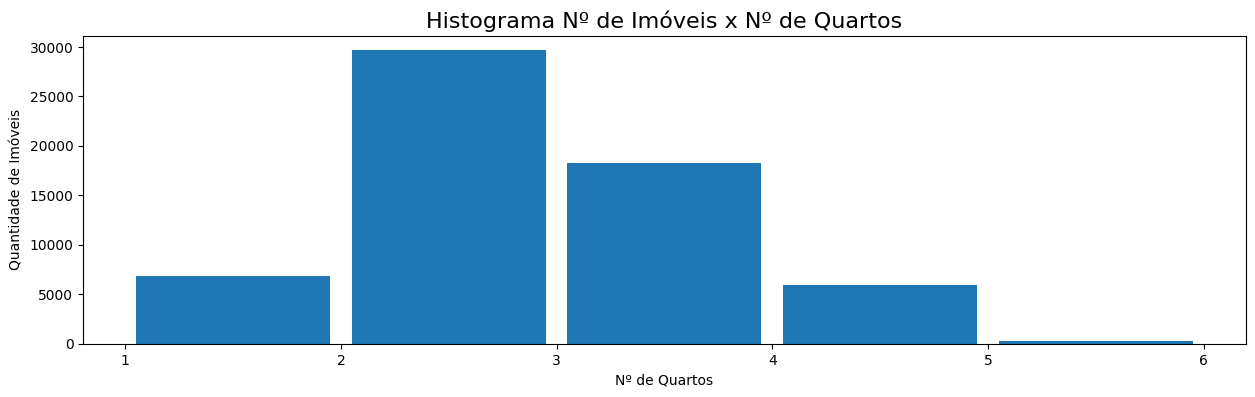

In [8]:
quartos = dados_filt_ord['bedrooms']

plt.figure(figsize=(15,4))
plt.hist(quartos,rwidth=0.9 , bins = range(1,7,1))
plt.title('Histograma Nº de Imóveis x Nº de Quartos', fontsize=16)
plt.xlabel('Nº de Quartos')
plt.ylabel('Quantidade de Imóveis')
plt.show()


### <li><font color="#800080">Exibindo a quantidade de imóveis para cada número de quartos na amostra:</font>

In [9]:
# Mostra qual a quantidade de quartos nos imóveis do conjunto de dados.
dados_bed = dados_filt_ord.sort_values(['bedrooms'])
dados_bed['bedrooms'].unique() 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 16, 17, 19, 20])

In [10]:
# Mostra nº de quartos x nº de imóveis na amostra.
dados_bed['bedrooms'].value_counts()

2     29650
3     18264
1      6859
4      5957
5       210
6        17
10        4
7         2
8         1
9         1
16        1
17        1
19        1
20        1
Name: bedrooms, dtype: int64

<font color="#800080"><b>OBS.:</b> Nota-se que podemos desconsiderar imóveis com mais de 5 dormitórios por não serem em uma quantidade representativa no conjunto de dados.</font>

### <li><font color="#800080">Removendo os imóveis com mais de 5 quartos do dataframe:</font>

In [11]:
filtro_bedrooms = dados_bed['bedrooms'] < 6
dados_bed_filt = dados_bed[filtro_bedrooms]
dados_bed_filt['bedrooms'].value_counts()

2    29650
3    18264
1     6859
4     5957
5      210
Name: bedrooms, dtype: int64

### <li><font color="#800080">Contando a quantidade de imóveis em cada bairro:</font>

In [12]:
dados_bairros = dados_bed_filt['address_neighborhood'].value_counts()
dados_bairros

Parque Residencial Aquarius     11990
Vila Ema                         2920
Jardim Esplanada                 2744
Jardim Satélite                  2714
Jardim das Indústrias            2649
                                ...  
Loteamento Villa Branca             1
Loteamento Portal Santa Inês        1
Parque Interlagos                   1
Jardim America                      1
Portal dos Passaros                 1
Name: address_neighborhood, Length: 206, dtype: int64

<font color="#800080"><b>OBS.:</b> Aparentemente, em alguns bairros não há amostras suficientes para concluir sobre o valor dos aluguéis.</font>

### <li><font color="#800080">Investigando quais bairros possuem menos de 10 amostras no dataframe:</font>

In [13]:
filtro_bairros = dados_bed_filt['address_neighborhood'].value_counts() > 10
filtro_bairros.value_counts()

True     129
False     77
Name: address_neighborhood, dtype: int64

<font color="#800080"><b>OBS.:</b> Observa-se que 77 bairros possuem menos de 10 amostras no dataframe, restando 129 com 10 ou mais amostras.</font>

In [14]:
display(filtro_bairros)

Parque Residencial Aquarius      True
Vila Ema                         True
Jardim Esplanada                 True
Jardim Satélite                  True
Jardim das Indústrias            True
                                ...  
Loteamento Villa Branca         False
Loteamento Portal Santa Inês    False
Parque Interlagos               False
Jardim America                  False
Portal dos Passaros             False
Name: address_neighborhood, Length: 206, dtype: bool

In [15]:
# Criando um dataframe com os dados sobre a quantidade de amostras > 10 (True) ou não (False).
dados_bairros_filt = pd.DataFrame({"maior que 10":filtro_bairros})
dados_bairros_filt['bairros'] = dados_bairros_filt.index

# Exibindo os 50 últimos bairros com amostras em quantidade < 10.
dados_bairros_filt.index = range(206)
dados_bairros_filt = dados_bairros_filt[['bairros','maior que 10']]
dados_bairros_filt.tail(50)

,bairros,maior que 10
156,Jardim Altos de Santana,False
157,Urbanova VII,False
158,Jardim Santa Maria,False
159,Loteamento Tom Jobim,False
160,Parque dos Ipês,False
161,Parque Martim Cererê,False
162,Vila Nova Conceição,False
163,Putim,False
164,Residencial São Francisco,False
165,Jardim Residencial Golden Park,False


<font color="#800080"><b>OBS.:</b> Nota-se que alguns bairros foram nomeados de formas diferentes, ocupando mais de uma linha, como por exemplo:
 *   Urbanova III, Urbanova IV e Condomínio Residencial Alphaville I = Urbanova;
 *   Jardim Aquarius = Parque Residencial Aquarius</font>

In [16]:
# Exibindo as várias denominações para o bairro Urbanova na amostra. 
dados_bairros_filt2 = dados_bairros_filt[dados_bairros_filt['bairros'].str.contains('Urbanova')]
display(dados_bairros_filt2)

,bairros,maior que 10
19,Urbanova,True
26,Urbanova V,True
44,Urbanova VI,True
45,Loteamento Urbanova II,True
78,Urbanova I,True
157,Urbanova VII,False
168,Urbanova III,False
172,Urbanova IV-A,False


In [17]:
#Exibindo as denominações do bairro Parque Residencial Aquarius.
dados_bairros_filt3 = dados_bairros_filt[dados_bairros_filt['bairros'].str.contains('Aquarius')]
display(dados_bairros_filt3)

,bairros,maior que 10
0,Parque Residencial Aquarius,True
175,Jardim Aquarius,False


<font color="#800080"><b>OBS.:</b> <u>Concluindo que não será possível utilizar os nomes dos bairros como parâmetros para ferramentas de Machine Learning, decidindo encontrar as coordenadas geográficas como parâmetros para melhor representar a localização de cada imóvel.</u></font>

### <li><font color="#800080">Limpando Valores NaN e Atributos que não contribuirão para o Aprendizado de Máquina:</font>

In [18]:
# Com a função info() abaixo, foi possível observar:
# Há muitos valores NaN para os nomes de ruas. Logo, essa coluna poderá ser eliminada.
# Há 1045 imóveis com valores NaN para o número de vagas de carro. Talvez possamos considerar como zero o número de vagas nesses casos, a investigar a seguir.
# Há apenas 2 imóveis com NaN como valor de CEP. Caso haja nome da rua, poderemos inserir esses valores manualmente.
dados_bed_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60940 entries, 55389 to 21664
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address_neighborhood     60937 non-null  object 
 1   address_street           30435 non-null  object 
 2   address_zipcode          60938 non-null  float64
 3   latitude                 0 non-null      float64
 4   longitude                0 non-null      float64
 5   bathrooms                60940 non-null  int64  
 6   bedrooms                 60940 non-null  int64  
 7   suites                   60940 non-null  int64  
 8   parking_spaces           59895 non-null  float64
 9   total_area               60940 non-null  int64  
 10  price                    60940 non-null  int64  
 11  price_monthly_condo_fee  60940 non-null  int64  
 12  price_yearly_iptu        60940 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 6.5+ MB


In [19]:
# Exibindo as linhas com valores de CEP nulos ou NaN.
display(dados_bed_filt[dados_bed_filt['address_zipcode'] == 0])
display(dados_bed_filt[dados_bed_filt['address_zipcode'].isnull()])
# Exibindo a quantidade de NaN para cada coluna.
dados_bed_filt.isnull().sum()

,address_neighborhood,address_street,address_zipcode,latitude,longitude,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu
40533,Jardim Telespark,NaN,0.0,NaN,NaN,1,2,0,0.0,53,700,280,30
42264,Parque Industrial,Rua Teresina,0.0,NaN,NaN,2,2,1,1.0,65,1150,408,59
45781,Jardim Aquarius,NaN,0.0,NaN,NaN,3,3,3,2.0,96,3520,750,120
40283,Jardim Aquarius,NaN,0.0,NaN,NaN,1,3,0,2.0,90,1500,659,95


,address_neighborhood,address_street,address_zipcode,latitude,longitude,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu
46407,Parque Industrial,Rua Icatu,NaN,NaN,NaN,2,2,1,NaN,68,1000,270,0
43812,NaN,NaN,NaN,NaN,NaN,2,3,1,2.0,70,1650,585,0


address_neighborhood           3
address_street             30505
address_zipcode                2
latitude                   60940
longitude                  60940
bathrooms                      0
bedrooms                       0
suites                         0
parking_spaces              1045
total_area                     0
price                          0
price_monthly_condo_fee        0
price_yearly_iptu              0
dtype: int64

<font color="#800080"><b>OBS.:</b>
     <li>Foi possível encontrar os CEPs das Ruas Icatu e Teresina no Parque Industrial, 12237-010 e 12235-610, respectivamente.
     <li>As linhas 40533, 45781 e 40283, como não tem nome das ruas, não será possível encontrar o CEP e as coordenadas geográficas, portanto iremos eliminá-las.
     <li>Nota-se que podemos eliminar a linha 43812, pois não há nenhuma informação de endereço ou CEP.</font>

In [20]:
# Inserindo os CEPs descobertos.
dados_bed_filt.loc[42264,'address_zipcode'] = 12235610
dados_bed_filt.loc[46407,'address_zipcode'] = 12237010
# Eliminando as linhas sem nome de rua nem CEP.
dados_bed_filt.drop([40283,40533,43812,45781],inplace = True)

<ipython-input-20-a48bf19a1f49>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_bed_filt.drop([40283,40533,43812,45781],inplace = True)


In [21]:
# Nota-se que agora todas as linhas possuem CEP.
dados_bed_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60936 entries, 55389 to 21664
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address_neighborhood     60934 non-null  object 
 1   address_street           30435 non-null  object 
 2   address_zipcode          60936 non-null  float64
 3   latitude                 0 non-null      float64
 4   longitude                0 non-null      float64
 5   bathrooms                60936 non-null  int64  
 6   bedrooms                 60936 non-null  int64  
 7   suites                   60936 non-null  int64  
 8   parking_spaces           59891 non-null  float64
 9   total_area               60936 non-null  int64  
 10  price                    60936 non-null  int64  
 11  price_monthly_condo_fee  60936 non-null  int64  
 12  price_yearly_iptu        60936 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 6.5+ MB


<font color="#800080"><b>OBS.:</b> Como todas as linhas possuem CEP, podemos eliminar as colunas com nome de rua e nome do bairro que não irão influir no algoritmo de Machine Learning.</font>

In [22]:
dados_bed_filt.drop(columns=['address_neighborhood','address_street'],inplace = True)

<ipython-input-22-a78af86c288e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_bed_filt.drop(columns=['address_neighborhood','address_street'],inplace = True)


In [23]:
dados_bed_filt[dados_bed_filt['parking_spaces'].isnull()]

,address_zipcode,latitude,longitude,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu
12225,12242840.0,NaN,NaN,1,1,0,NaN,40,2000,0,0
15081,12242840.0,NaN,NaN,1,1,0,NaN,40,2000,0,0
2993,12242840.0,NaN,NaN,1,1,0,NaN,47,1800,450,40
18474,12243590.0,NaN,NaN,1,1,1,NaN,33,1600,100,0
27856,12243590.0,NaN,NaN,1,1,1,NaN,33,1600,100,0
...,...,...,...,...,...,...,...,...,...,...,...
4512,12240710.0,NaN,NaN,3,4,1,NaN,0,5700,0,78
17638,12246140.0,NaN,NaN,3,4,3,NaN,192,7500,1090,0
9925,12242000.0,NaN,NaN,6,4,4,NaN,248,8500,0,0
6627,12242000.0,NaN,NaN,6,4,4,NaN,248,8500,0,0


<font color="#800080"><b>OBS.:</b> Observa-se que não há informação sobre número de vagas de garagem mesmo para apartamentos maiores que certamente têm vagas disponíveis. Logo, deve-se eliminar as linhas com NaN no número de vagas, pois implica em eliminar apenas 1,7% dos dados da amostra.</font>

In [24]:
dados_bed_filt = dados_bed_filt.dropna(subset = ['parking_spaces'])
dados_bed_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59891 entries, 55389 to 21664
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address_zipcode          59891 non-null  float64
 1   latitude                 0 non-null      float64
 2   longitude                0 non-null      float64
 3   bathrooms                59891 non-null  int64  
 4   bedrooms                 59891 non-null  int64  
 5   suites                   59891 non-null  int64  
 6   parking_spaces           59891 non-null  float64
 7   total_area               59891 non-null  int64  
 8   price                    59891 non-null  int64  
 9   price_monthly_condo_fee  59891 non-null  int64  
 10  price_yearly_iptu        59891 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 5.5 MB


### <li><font color="#800080">Importando dataframe com relação CEPs x Latitude e Longitude:</font>

In [25]:
# Dados de CEPs x ruas x latitude e longitude fornecidos pelo IBGE e obtidos no site Kaggle: 
url_cep2018 = pd.read_csv('https://github.com/fabiollg/PI-4_Predicao_Valores_Imoveis_SJC/raw/main/dados/ceps_coord_2018.zip', compression='zip',encoding='latin')
display(url_cep2018.head())

,cep,tipo,nome_logradouro,logradouro,bairro,cidade,estado,complemento,grandes_usuarios,tipo_sem_acento,nome_logradouro_sem_acento,logradouro_sem_acento,bairro_sem_acento,cidade_sem_acento,complemento_sem_acento,grandes_usuarios_sem_acento,latitude,longitude,cidade_ibge,cidade_area,ddd,cep_ativo
0,1001000,Praça,da Sé,Praça da Sé,Sé,São Paulo,SP,lado ímpar,NaN,Praca,da Se,Praca da Se,Se,Sao Paulo,lado impar,NaN,-23.550278,-46.634218,3550308,1521.11,11,S
1,1001001,Praça,da Sé,Praça da Sé,Sé,São Paulo,SP,lado par,NaN,Praca,da Se,Praca da Se,Se,Sao Paulo,lado par,NaN,-23.549865,-46.634020,3550308,1521.11,11,S
2,1001010,Rua,Filipe de Oliveira,Rua Filipe de Oliveira,Sé,São Paulo,SP,NaN,NaN,Rua,Filipe de Oliveira,Rua Filipe de Oliveira,Se,Sao Paulo,NaN,NaN,-23.551479,-46.633272,3550308,1521.11,11,S
3,1001900,Praça,"da Sé, 108","Praça da Sé, 108",Sé,São Paulo,SP,NaN,UNESP - Universidade Estadual Júlio de Mesquit...,Praca,"da Se, 108","Praca da Se, 108",Se,Sao Paulo,NaN,UNESP - Universidade Estadual Julio de Mesquit...,-23.549896,-46.634378,3550308,1521.11,11,S
4,1001901,Praça,"da Sé, 371","Praça da Sé, 371",Sé,São Paulo,SP,NaN,Edifício Santa Lídia,Praca,"da Se, 371","Praca da Se, 371",Se,Sao Paulo,NaN,Edificio Santa Lidia,-23.551829,-46.634234,3550308,1521.11,11,S


### <li><font color="#800080">Extraindo apenas os CEPs de São José dos Campos e Eliminando colunas desnecessárias:</font>

In [26]:
#código IBGE de São José dos Campos = 3549904
filtro_ceps = url_cep2018['cidade_ibge'] == 3549904
url_cep2018 = url_cep2018[filtro_ceps]
url_cep2018_filt = url_cep2018[['cep','latitude','longitude']]

In [27]:
# Exibindo a relação entre todos os CEPs de SJC e suas respectivas latitude e longitude.
display(url_cep2018_filt)
url_cep2018_filt.info()

,cep,latitude,longitude
127622,12209000,-23.178073,-45.888701
127623,12209002,-23.177065,-45.886526
127624,12209003,-23.178079,-45.885866
127625,12209004,-23.177203,-45.885419
127626,12209005,-23.179309,-45.886465
...,...,...,...
132781,12248712,-23.167663,-45.787973
132782,12248899,-23.150912,-45.904347
132783,12249000,-23.223701,-45.900907
132784,12249970,-22.912452,-45.960219


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5164 entries, 127622 to 132785
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cep        5164 non-null   int64  
 1   latitude   5164 non-null   float64
 2   longitude  5164 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 161.4 KB


### <li><font color="#800080">Adicionando os valores das coordenadas geográficas no dataframe dos imóveis:</font>

In [28]:
#Convertendo os ceps para Int64 na base de dados dos imóveis para ficarem de mesmo tipo da base de dados de ceps.
#Convertendo também as vagas de garagem para Inteiros.
dados_bed_filt['address_zipcode'] = dados_bed_filt['address_zipcode'].convert_dtypes()
dados_bed_filt['parking_spaces'] = dados_bed_filt['parking_spaces'].convert_dtypes()

In [29]:
dados_bed_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59891 entries, 55389 to 21664
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address_zipcode          59891 non-null  Int64  
 1   latitude                 0 non-null      float64
 2   longitude                0 non-null      float64
 3   bathrooms                59891 non-null  int64  
 4   bedrooms                 59891 non-null  int64  
 5   suites                   59891 non-null  int64  
 6   parking_spaces           59891 non-null  Int64  
 7   total_area               59891 non-null  int64  
 8   price                    59891 non-null  int64  
 9   price_monthly_condo_fee  59891 non-null  int64  
 10  price_yearly_iptu        59891 non-null  int64  
dtypes: Int64(2), float64(2), int64(7)
memory usage: 5.6 MB


In [30]:
# Efetuar merge com CEPs.
dados_bed_filt = dados_bed_filt.merge(url_cep2018_filt, how = 'left', left_on = 'address_zipcode', right_on = 'cep')

In [31]:
display(dados_bed_filt)

,address_zipcode,latitude_x,longitude_x,bathrooms,bedrooms,suites,parking_spaces,total_area,price,price_monthly_condo_fee,price_yearly_iptu,cep,latitude_y,longitude_y
0,12212531,NaN,NaN,1,1,0,0,45,880,0,0,12212531.0,-23.150556,-45.904873
1,12242840,NaN,NaN,1,1,0,2,58,1450,680,50,12242840.0,-23.198656,-45.899806
2,12242840,NaN,NaN,1,1,0,2,40,1300,600,55,12242840.0,-23.198656,-45.899806
3,12242840,NaN,NaN,1,1,0,1,48,1100,625,0,12242840.0,-23.198656,-45.899806
4,12242840,NaN,NaN,1,1,0,1,50,1300,563,0,12242840.0,-23.198656,-45.899806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59886,12245500,NaN,NaN,2,5,2,2,99,2900,600,0,12245500.0,-23.204227,-45.885531
59887,12233002,NaN,NaN,4,5,2,3,0,3500,1390,254,12233002.0,-23.251533,-45.885733
59888,12242270,NaN,NaN,5,5,2,6,2500,40000,0,0,12242270.0,-23.192424,-45.898719
59889,12233002,NaN,NaN,4,5,2,3,0,3500,1390,254,12233002.0,-23.251533,-45.885733


### <li><font color="#800080">Eliminando Colunas ou Linhas que não serão Úteis:</font>

In [32]:
dados_bed_filt.drop(columns=['latitude_x','longitude_x','cep'],inplace=True)

In [33]:
# Renomeando as colunas
dados_bed_filt.rename(columns={'address_zipcode': 'cep', 'bathrooms': 'banheiros', 'parking_spaces': 'vagas_garagem', 'price': 'aluguel', 'price_monthly_condo_fee': 'condominio', 'price_yearly_iptu': 'iptu', 'latitude_y': 'latitude', 'longitude_y':'longitude'},inplace=True)
display(dados_bed_filt.head())
display(dados_bed_filt.shape)
# Mostrando quantas linhas possuem zero como valor da área do imóvel
display(dados_bed_filt[dados_bed_filt['total_area'] == 0].shape)
# Mostrando quantas linhas possuem zero como valor do IPTU do imóvel
display(dados_bed_filt[dados_bed_filt['iptu'] == 0].shape)

,cep,banheiros,bedrooms,suites,vagas_garagem,total_area,aluguel,condominio,iptu,latitude,longitude
0,12212531,1,1,0,0,45,880,0,0,-23.150556,-45.904873
1,12242840,1,1,0,2,58,1450,680,50,-23.198656,-45.899806
2,12242840,1,1,0,2,40,1300,600,55,-23.198656,-45.899806
3,12242840,1,1,0,1,48,1100,625,0,-23.198656,-45.899806
4,12242840,1,1,0,1,50,1300,563,0,-23.198656,-45.899806


(59891, 11)

(11282, 11)

(19043, 11)

<font color="#800080"><b>OBS.:</b>
- Observamos mais de 11 mil linhas com valor zero da área e mais de 19 mil com valor zero para o IPTU. Sabemos que, principalmente os valores da área do imóvel, são determinantes para a determinação do valor dos seus aluguéis. Logo, não podemos manter esses valores nulos como dados de entrada para um algoritmo de aprendizado de máquina.
- O valor do IPTU é dependente da área do imóvel e de sua localização geográfica, logo podemos dispensar a utilização da coluna IPTU, evitando ter que eliminar as 19 mil linhas nulas.</font>

In [34]:
# Eliminando linhas com área do imóvel = 0.
dados_tratados = dados_bed_filt[dados_bed_filt['total_area'] != 0]
# Removendo coluna 'iptu' do dataframe.
dados_tratados = dados_tratados.drop(columns='iptu')
display(dados_tratados.head())

,cep,banheiros,bedrooms,suites,vagas_garagem,total_area,aluguel,condominio,latitude,longitude
0,12212531,1,1,0,0,45,880,0,-23.150556,-45.904873
1,12242840,1,1,0,2,58,1450,680,-23.198656,-45.899806
2,12242840,1,1,0,2,40,1300,600,-23.198656,-45.899806
3,12242840,1,1,0,1,48,1100,625,-23.198656,-45.899806
4,12242840,1,1,0,1,50,1300,563,-23.198656,-45.899806


In [35]:
# Exibindo o número de linhas e colunas remanescentes no dataframe.
dados_tratados.shape

(48609, 10)

### <li><font color="#800080">Eliminação de Outliers:</font>

In [36]:
# Observando os extremos de cada parâmetro do dataframe.
dados_tratados.describe(percentiles=[0.01,0.25,0.50,0.75,0.995])

,cep,banheiros,bedrooms,suites,vagas_garagem,total_area,aluguel,condominio,latitude,longitude
count,48609.0,48609.000000,48609.000000,48609.000000,48609.0,4.860900e+04,4.860900e+04,4.860900e+04,48360.000000,48360.000000
mean,12238056.123928,1.939538,2.375733,0.927359,1.54636,3.246334e+02,3.508205e+03,8.885837e+02,-22.841057,-45.573176
std,97158.633924,1.146284,0.827984,0.981504,1.148906,3.744705e+04,2.387660e+04,2.058932e+04,5.013969,4.341702
min,12242.0,1.000000,1.000000,0.000000,0.0,1.000000e+00,2.700000e+02,0.000000e+00,-23.680094,-47.467191
1%,12210090.0,1.000000,1.000000,0.000000,0.0,3.300000e+01,6.500000e+02,0.000000e+00,-23.265539,-45.953995
25%,12235070.0,1.000000,2.000000,0.000000,1.0,5.400000e+01,1.320000e+03,3.200000e+02,-23.223409,-45.908882
50%,12242840.0,2.000000,2.000000,1.000000,1.0,7.100000e+01,2.000000e+03,4.300000e+02,-23.214139,-45.902287
75%,12246013.0,2.000000,3.000000,1.000000,2.0,1.000000e+02,3.200000e+03,6.300000e+02,-23.199381,-45.888362
99.5%,12248610.0,6.000000,4.000000,4.000000,4.0,4.500000e+02,1.800000e+04,2.500000e+03,45.537405,13.660080
max,13660310.0,11.000000,5.000000,40.000000,50.0,8.052809e+06,1.296000e+06,2.500000e+06,45.537405,13.660080


In [37]:
# Eliminando outliers baseado na estatística da amostra obtida acima.
filtro_suites = dados_tratados['suites'] < 6
dados_tratados = dados_tratados[filtro_suites]
filtro_banheiros = dados_tratados['banheiros'] < 6
dados_tratados = dados_tratados[filtro_banheiros]
filtro_area = dados_tratados['total_area'] < 500
dados_tratados = dados_tratados[filtro_area]
filtro_area = dados_tratados['total_area'] > 24
dados_tratados = dados_tratados[filtro_area]
filtro_vagas = dados_tratados['vagas_garagem'] < 10
dados_tratados = dados_tratados[filtro_vagas]
filtro_condominio = dados_tratados['condominio'] < 5000
dados_tratados = dados_tratados[filtro_condominio]
filtro_aluguel = dados_tratados['aluguel'] < 30000
dados_tratados = dados_tratados[filtro_aluguel]

In [38]:
# Eliminando linhas sem informação de coordenadas geográficas.
dados_tratados = dados_tratados.dropna()
# Eliminando a coluna 'cep', pois seu objetivo era meramente possibilitar a obtenção das coordenadas geográficas.
dados_tratados = dados_tratados.drop(columns='cep')
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46938 entries, 0 to 59886
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   banheiros      46938 non-null  int64  
 1   bedrooms       46938 non-null  int64  
 2   suites         46938 non-null  int64  
 3   vagas_garagem  46938 non-null  Int64  
 4   total_area     46938 non-null  int64  
 5   aluguel        46938 non-null  int64  
 6   condominio     46938 non-null  int64  
 7   latitude       46938 non-null  float64
 8   longitude      46938 non-null  float64
dtypes: Int64(1), float64(2), int64(6)
memory usage: 3.6 MB


In [39]:
# Eliminando linhas com coordenadas geográficas foram a região de São José dos Campos.
# Dados dos limites geográficos de SJC extraídos da página do IBGE: https://servicodados.ibge.gov.br/api/v3/malhas/municipios/3549904/metadados
# "centroide":{"longitude":-45.9285,"latitude":-23.0906},
# "regiao-limitrofe":[{"longitude":-46.108,"latitude":-22.8163},{"longitude":-45.7213,"latitude":-23.3067}]
dados_tratados = dados_tratados[dados_tratados['latitude'] < -22.8]
dados_tratados = dados_tratados[-23.4 < dados_tratados['latitude']]
dados_tratados = dados_tratados[dados_tratados['longitude'] < -45.7]
dados_tratados = dados_tratados[-46.2 < dados_tratados['longitude']]
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46324 entries, 0 to 59886
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   banheiros      46324 non-null  int64  
 1   bedrooms       46324 non-null  int64  
 2   suites         46324 non-null  int64  
 3   vagas_garagem  46324 non-null  Int64  
 4   total_area     46324 non-null  int64  
 5   aluguel        46324 non-null  int64  
 6   condominio     46324 non-null  int64  
 7   latitude       46324 non-null  float64
 8   longitude      46324 non-null  float64
dtypes: Int64(1), float64(2), int64(6)
memory usage: 3.6 MB


<hr>

# <b>3) Visualizando os Dados Tratados

In [40]:
# Instalando biblioteca Seaborn.
%pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
# Importando biblioteca Seaborn.
import seaborn as sns

### <li><font color="#800080">Visualizando a Matriz de Correlação entre os Dados:</font>

<Axes: >

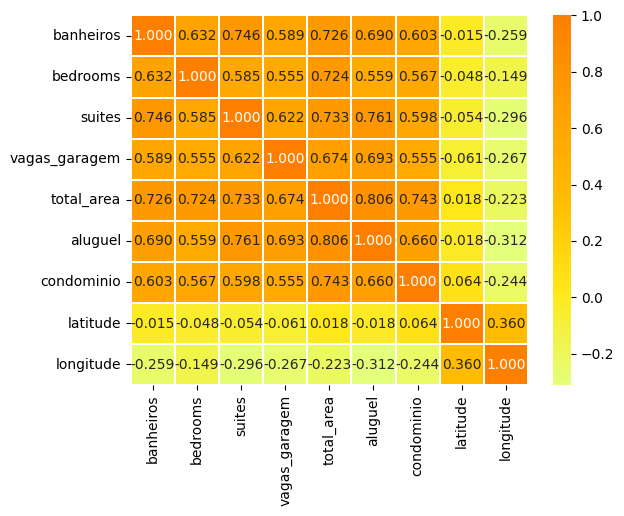

In [42]:
dados_tratados.corr()
sns.heatmap(dados_tratados.corr(),cmap='Wistia',annot=True, fmt='.3f', linewidths=.2)

<font color="#800080"><b>OBS.:</b> Observa-se que as variáveis que mais influenciam diretamente o valor do aluguel são a área total, o nº de suites, o nº de banheiros e o nº de vagas de garagem. Foi possível notar também que as variáveis que menos influenciam diretamente o valor dos aluguéis foram a latitude e longitude.</font>

### <li><font color="#800080">Visualizando as Correlações em Gráficos:</font>

<Axes: xlabel='bedrooms', ylabel='aluguel'>

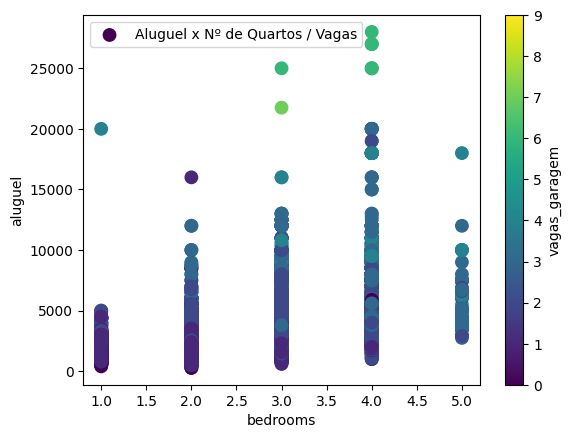

In [43]:
# Gráfico em que é possível verificar a influência do número de quartos e vagas de garagem no valor dos aluguéis.
dados_tratados.plot.scatter(x='bedrooms', y='aluguel', c= 'vagas_garagem', cmap= 'viridis', label= 'Aluguel x Nº de Quartos / Vagas', s=80)

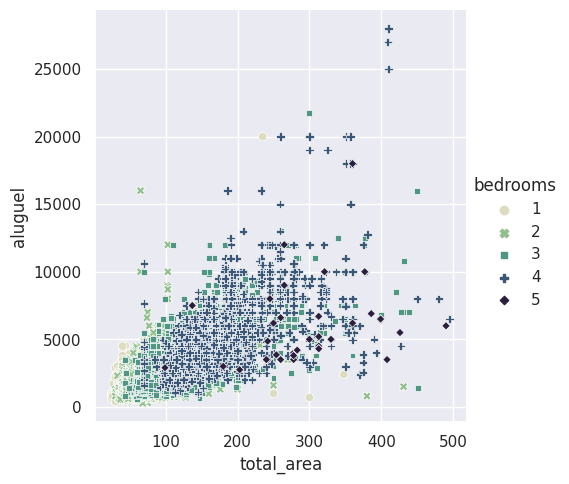

In [44]:
# Gráfico em que é possível verificar a influência da área do imóvel e número de quartos no valor dos aluguéis.
sns.set_theme(style="darkgrid")
sns.relplot(data= dados_tratados, x='total_area', y= 'aluguel',hue= 'bedrooms', style= 'bedrooms', palette= 'ch: s=.5, r=-.8')

<font color="#800080"><b>OBS.:</b> Neste gráfico podemos notar que ainda há outliers presentes como, por exemplo, imóvel de 1 quarto com área de cerca de 220 m² e aluguel de 20 mil reais e imóvel de 2 quartos com área de cerca de 70 m² e aluguel de cerca de 16 mil reais.
<u>Vamos inicialmente tentar gerar modelos de Machine Learning mantendo esses outliers</u>, e caso esta solução inicial não seja satisfatória, efetuaremos uma limpeza mais aprofundada dos dados para ajustar os modelos.</font>

### <li><font color="#800080">Visualizando a Distribuição Geográfica dos Aluguéis:</font>

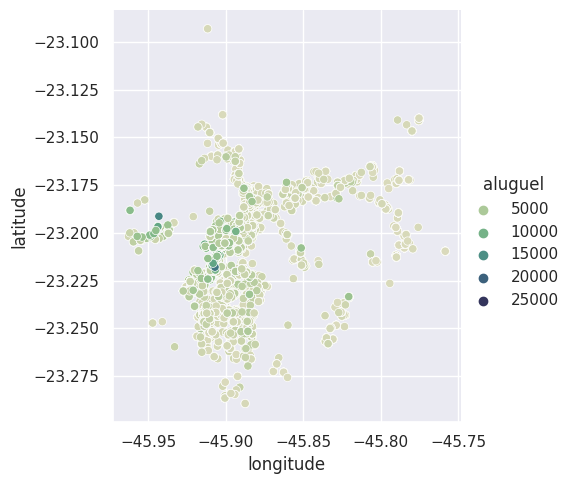

In [45]:
# Gráfico em que é possível verificar a variação dos aluguéis segundo a posição geográfica dos imóveis na cidade.
sns.relplot(data= dados_tratados, x='longitude', y= 'latitude',hue= 'aluguel', palette= 'ch: s=.5, r=-.8')

<font color="#800080"><b>OBS.:</b> Neste gráfico é possível entender porque a correlação entre Latitude/Longitude x Aluguéis foi a mais baixa na matriz de correlações, já que há basicamente 2 regiões de concentração de aluguéis mais altos e todas as demais regiões com valores de aluguéis semelhantes.</font>

<hr>

# <b>4) Algoritmos de Aprendizado de Máquina</b>

In [46]:
# Instalando a biblioteca scikit-learn para obter os algoritmos de aprendizagem de máquina.
%pip install sklearn
%pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=947af6905bdd984fe7922ad71af93a67b3514711a13098cb7a18d468645def4e
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
# Importando a biblioteca train_test_split para dividir o conjunto de dados entre treino e teste.
from sklearn.model_selection import train_test_split

### <li><font color="#800080">Dividindo os dados em Dados de Entrada e Dados de Saída do Modelo:</font>

In [48]:
# Definindo x como os dados de entrada.
x = dados_tratados.drop(columns='aluguel')
# Defininfo y como dados de saída.
y = dados_tratados['aluguel']

### <li><font color="#800080">Dividindo os dados em Dados de Treino e Dados de Teste:</font>

In [49]:
# Utilizando 80% dos dados para treino dos modelos de aprendizagem e 20% para teste destes modelos.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [50]:
print(f'Número de parâmetros de entrada = {x_train.shape[1]}')
print(f'Número de linhas de treinamento = {x_train.shape[0]}')
print(f'Número de linhas de teste = {x_test.shape[0]}')

Número de parâmetros de entrada = 8
Número de linhas de treinamento = 37059
Número de linhas de teste = 9265


### <li><font color="#800080">Treinando os modelos de Inteligência Artificial sem Normalizar os Dados:</font>

In [51]:
# Importando os modelos a serem utilizados.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [52]:
# Fase de treino dos modelos
# Modelo Regressão Linear
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
# Modelo RANSAC
ran_reg = RANSACRegressor()
ran_reg.fit(x_train, y_train)
# Modelo Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

### <li><font color="#800080">Testando os Modelos:</font>

In [53]:
# Registrando os testes dos 3 modelos
test_pred_lin = lin_reg.predict(x_test)
test_pred_ran = ran_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

### <li><font color="#800080">Avaliando os Resultados dos Testes:</font>

In [54]:
# Resultado do modelo de regressão linear
r2_lin = metrics.r2_score(y_test,test_pred_lin)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))
print(f'R² da Regressão Linear: {r2_lin:.4f}')
print(f'RSME da Regressão Linear: {rmse_lin:.2f}')

R² da Regressão Linear: 0.7593
RSME da Regressão Linear: 932.56


In [55]:
# Resultado do modelo RANSAC
r2_ran = metrics.r2_score(y_test,test_pred_ran)
rmse_ran = np.sqrt(metrics.mean_squared_error(y_test, test_pred_ran))
print(f'R² da Regressão RANSAC: {r2_ran:.4f}')
print(f'RSME da Regressão RANSAC: {rmse_ran:.2f}')

R² da Regressão RANSAC: 0.7123
RSME da Regressão RANSAC: 1019.64


In [56]:
# Resultado do modelo Random Forest
r2_rf = metrics.r2_score(y_test,test_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))
print(f'R² da Regressão Random Forest: {r2_rf:.4f}')
print(f'RSME da Regressão Random Forest: {rmse_rf:.2f}')

R² da Regressão Random Forest: 0.9394
RSME da Regressão Random Forest: 468.11


<font color="#800080"><b>OBS.:</b> Observa-se que o modelo Random Forest apresentou melhor resultado dentre os 3 modelos testados inicialmente.</font>

### <font color="#800080"><li>Utilizando Modelo Extreme Gradient Boosting (XGBoost) </font>

In [57]:
# Instalando a biblioteca xgboost.
%pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
# Importando da biblioteca do Extreme Gradient Boosting Regressor
from xgboost import XGBRegressor

In [59]:
# Ajuste de parâmetros
xgb_reg = XGBRegressor(learning_rate=0.10,
                       n_estimators=1100,
                       max_depth=9,
                       min_child_weight=1,
                       subsample=0.5,
                       colsample_bynode=0.5,
                       random_state=0
                       )
# Treinando o modelo
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=0.5,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [60]:
# Testando e Avaliando o Resultado.
test_pred_xgb = xgb_reg.predict(x_test)

r2_xgb = metrics.r2_score(y_test,test_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, test_pred_xgb))

print(f'R² da Regressão XGBoost: {r2_xgb:.4f}')
print(f'RSME da Regressão XGBoost: {rmse_xgb:.2f}')

R² da Regressão XGBoost: 0.9413
RSME da Regressão XGBoost: 460.61


<font color="#800080"><b>OBS.:</b> Após efetuar o ajuste dos parâmetros (tunning), observou-se que o modelo XGBoost apresentou uma pequena melhora em relação ao Random Forest.</font>

### <font color="#800080"><li>Treinando Modelo de Rede Neural Artificial</font>

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [62]:
# Importando biblioteca para normalizar os dados
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [63]:
# Normalizando os dados de entrada (features)
colunas = x.columns
x_std_train = pd.DataFrame(minmax.fit_transform(x_train), columns= colunas)
x_std_test = pd.DataFrame(minmax.fit_transform(x_test), columns= colunas)

In [156]:
# Normalizando os dados de entrada (features)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_scal_train = pd.DataFrame(scaler.transform(x_train), columns= colunas)
x_scal_test = pd.DataFrame(scaler.transform(x_test), columns= colunas)

In [157]:
# Exibindo os dados normalizados
display(x_std_train.head())
display(x_scal_train.head())

,banheiros,bedrooms,suites,vagas_garagem,total_area,condominio,latitude,longitude
0,0.00,0.25,0.0,0.111111,0.046809,0.000000,0.804060,0.622493
1,0.00,0.00,0.2,0.111111,0.031915,0.000000,0.497517,0.272211
2,0.25,0.50,0.2,0.111111,0.095745,0.000000,0.610616,0.365468
3,0.25,0.25,0.2,0.222222,0.125532,0.100000,0.471274,0.277872
4,0.25,0.25,0.2,0.111111,0.078723,0.073333,0.614715,0.405126


,banheiros,bedrooms,suites,vagas_garagem,total_area,condominio,latitude,longitude
0,-0.859953,-0.440783,-1.001796,-0.679965,-0.806114,-1.569122,2.254911,2.196695
1,-0.859953,-1.675382,0.127327,-0.679965,-0.952359,-1.569122,-0.071098,-0.452583
2,0.118524,0.793816,0.127327,-0.679965,-0.325594,-1.569122,0.787086,0.252748
3,0.118524,-0.440783,0.127327,0.670165,-0.033104,-0.180210,-0.270226,-0.409772
4,0.118524,-0.440783,0.127327,-0.679965,-0.492731,-0.550586,0.818189,0.552687


In [65]:
# Exibindo as dimensões de treino e teste
print (f'Linhas e colunas de treino: {x_std_train.shape}')
print (f'Linhas e colunas de teste: {x_std_test.shape}')

Linhas e colunas de treino: (37059, 8)
Linhas e colunas de teste: (9265, 8)


In [158]:
from keras.utils.sidecar_evaluator import optimizer
# Criando a rede neural com 3 camadas ocultas de 32, 24 e 16 neurônios cada uma
rede = Sequential()
rede.add(Dense(32, input_dim= 8, activation= 'relu'))
rede.add(Dense(24, activation= 'relu'))
rede.add(Dense(16, activation= 'relu'))
rede.add(Dense(1, activation= 'linear'))
rede.compile(loss='mean_squared_error', optimizer= 'adam', metrics=['mae'])
rede.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 32)                288       
                                                                 
 dense_49 (Dense)            (None, 24)                792       
                                                                 
 dense_50 (Dense)            (None, 16)                400       
                                                                 
 dense_51 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,497
Trainable params: 1,497
Non-trainable params: 0
_________________________________________________________________


In [159]:
#Treinando a rede neural
history = rede.fit(x_scal_train, y_train, validation_split= 0.2, epochs= 120)

Epoch 1/120
927/927 [==============================] - 3s 2ms/step - loss: 3691948.0000 - mae: 1322.4631 - val_loss: 1210816.2500 - val_mae: 727.3436
Epoch 2/120
927/927 [==============================] - 2s 2ms/step - loss: 978338.3750 - mae: 668.3046 - val_loss: 1035252.8125 - val_mae: 646.6083
Epoch 3/120
927/927 [==============================] - 2s 2ms/step - loss: 887837.7500 - mae: 627.6276 - val_loss: 999222.3125 - val_mae: 632.6324
Epoch 4/120
927/927 [==============================] - 3s 3ms/step - loss: 868074.1875 - mae: 617.9059 - val_loss: 994994.5000 - val_mae: 625.8566
Epoch 5/120
927/927 [==============================] - 2s 2ms/step - loss: 859305.0000 - mae: 613.6326 - val_loss: 987624.3750 - val_mae: 628.1360
Epoch 6/120
927/927 [==============================] - 2s 2ms/step - loss: 856050.0000 - mae: 612.0638 - val_loss: 985744.3750 - val_mae: 620.1929
Epoch 7/120
927/927 [==============================] - 2s 2ms/step - loss: 851775.6875 - mae: 610.0181 - val_loss:

### <font color="#800080"><li>Verificando o Resultado do Treino da Rede Neural Artificial</font>

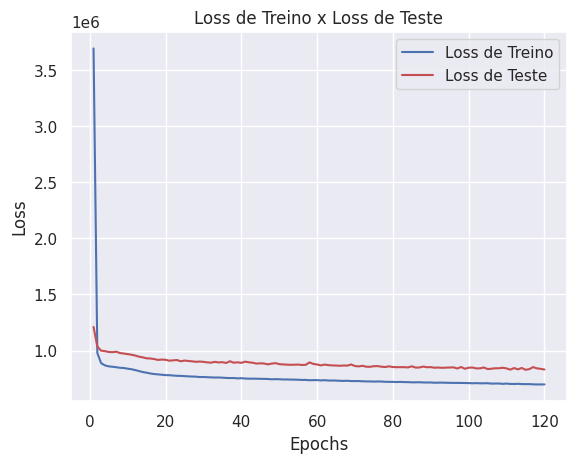

In [160]:
# Verificando o gráfico de redução do erro
loss = history.history['loss']
teste_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label= 'Loss de Treino')
plt.plot(epochs, teste_loss, 'r', label= 'Loss de Teste')
plt.title('Loss de Treino x Loss de Teste')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

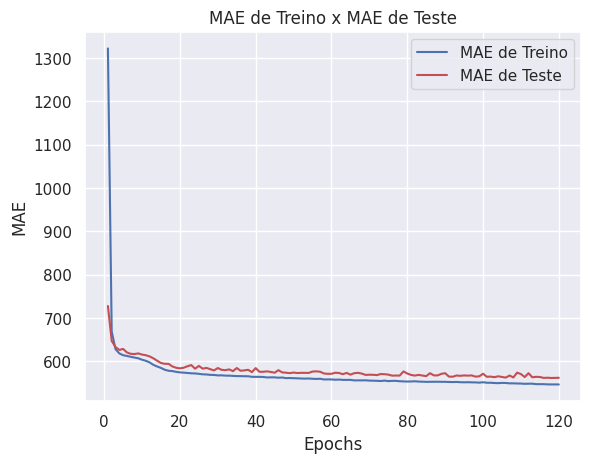

In [161]:
# Verificando a evolução da acurácia (MAE - Mean Absolute Error)
acc = history.history['mae']
teste_acc = history.history['val_mae']
plt.plot(epochs, acc, 'b', label= 'MAE de Treino')
plt.plot(epochs, teste_acc, 'r', label= 'MAE de Teste')
plt.title('MAE de Treino x MAE de Teste')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [162]:
# Avaliando os resultados
test_pred_rede_array = rede.predict(x_scal_test)
test_pred = pd.DataFrame(test_pred_rede_array, columns= ['aluguel_prev_rede'])
y_test_frame = pd.DataFrame(y_test)
y_test_frame.index = range(9265)

test_pred['aluguel_real'] = y_test_frame['aluguel']
test_pred['erro_perc_rede'] = (test_pred['aluguel_real'] - test_pred['aluguel_prev_rede']) / test_pred['aluguel_real']
display(test_pred)

290/290 [==============================] - 0s 1ms/step


,aluguel_prev_rede,aluguel_real,erro_perc_rede
0,3242.809570,3100,-0.046068
1,1935.401245,2200,0.120272
2,998.414001,1100,0.092351
3,1206.496460,800,-0.508121
4,4885.443359,3800,-0.285643
...,...,...,...
9260,927.970215,1000,0.072030
9261,1584.488403,1200,-0.320407
9262,1667.778198,1305,-0.277991
9263,6567.700684,6500,-0.010415


In [163]:
r2_rede = metrics.r2_score(y_test, test_pred_rede_array)
rmse_rede = np.sqrt(metrics.mean_squared_error(y_test, test_pred_rede_array))
print(f'R² da Regressão com Rede Neural: {r2_rede:.4f}')
print(f'RSME da Regressão com Rede Neural: {rmse_rede:.2f}')

R² da Regressão com Rede Neural: 0.8130
RSME da Regressão com Rede Neural: 821.92


<font color="#800080">OBS.: Observa-se que o erro obtido com o modelo treinado da rede neural foi maior do que o erro dos modelos Random Forest e XGBoost.

# <b>5) Análise da Solução Obtida</b>

### <font color="#800080"><li>Comparando todos os modelos de aprendizado de máquina utilizados:</font>

In [164]:
# Adicionando colunas com valores previstos pelo modelo de Regressão Linear
test_pred['aluguel_prev_linear'] = test_pred_lin
test_pred['erro_perc_linear'] = (test_pred['aluguel_real'] - test_pred['aluguel_prev_linear']) / test_pred['aluguel_real']
# Adicionando colunas com valores previstos pelo modelo de Regressão RANSAC
test_pred['aluguel_prev_ransac'] = test_pred_ran
test_pred['erro_perc_ransac'] = (test_pred['aluguel_real'] - test_pred['aluguel_prev_ransac']) / test_pred['aluguel_real']
# Adicionando colunas com valores previstos pelo modelo de Regressão Random Forest
test_pred['aluguel_prev_rf'] = test_pred_rf
test_pred['erro_perc_rf'] = (test_pred['aluguel_real'] - test_pred['aluguel_prev_rf']) / test_pred['aluguel_real']
# Adicionando colunas com valores previstos pelo modelo de Regressão XGBoost
test_pred['aluguel_prev_xgb'] = test_pred_xgb
test_pred['erro_perc_xgb'] = (test_pred['aluguel_real'] - test_pred['aluguel_prev_xgb']) / test_pred['aluguel_real']

In [165]:
# Exibindo tabela comparativa de todos os modelos de aprendizado de máquina utilizados

display(test_pred)

,aluguel_prev_rede,aluguel_real,erro_perc_rede,aluguel_prev_linear,erro_perc_linear,aluguel_prev_ransac,erro_perc_ransac,aluguel_prev_rf,erro_perc_rf,aluguel_prev_xgb,erro_perc_xgb
0,3242.809570,3100,-0.046068,2888.093562,0.068357,2592.456661,0.163724,3177.195238,-0.024902,3291.681885,-0.061833
1,1935.401245,2200,0.120272,2312.698536,-0.051227,2107.206557,0.042179,2049.683929,0.068325,1975.453125,0.102067
2,998.414001,1100,0.092351,756.513135,0.312261,1203.394629,-0.093995,1110.636190,-0.009669,1083.432251,0.015062
3,1206.496460,800,-0.508121,1266.924536,-0.583656,1606.137741,-1.007672,802.554405,-0.003193,816.920776,-0.021151
4,4885.443359,3800,-0.285643,4731.180440,-0.245047,4894.429941,-0.288008,3876.133333,-0.020035,3641.766357,0.041640
...,...,...,...,...,...,...,...,...,...,...,...
9260,927.970215,1000,0.072030,541.303189,0.458697,300.088538,0.699911,833.200000,0.166800,793.893433,0.206107
9261,1584.488403,1200,-0.320407,2103.470331,-0.752892,1857.856807,-0.548214,1367.600000,-0.139667,1422.853271,-0.185711
9262,1667.778198,1305,-0.277991,2131.310796,-0.633188,1922.053978,-0.472838,1915.315385,-0.467675,1747.134399,-0.338800
9263,6567.700684,6500,-0.010415,5921.875865,0.088942,5627.389086,0.134248,6415.000000,0.013077,6538.543457,-0.005930


In [166]:
test_pred.describe(percentiles=[0.05,0.10,0.15,0.25,0.50,0.75,0.90,0.95])

,aluguel_prev_rede,aluguel_real,erro_perc_rede,aluguel_prev_linear,erro_perc_linear,aluguel_prev_ransac,erro_perc_ransac,aluguel_prev_rf,erro_perc_rf,aluguel_prev_xgb,erro_perc_xgb
count,9265.000000,9265.000000,9265.000000,9265.000000,9265.000000,9265.000000,9265.000000,9265.000000,9265.000000,9265.000000,9265.000000
mean,2589.979980,2576.056449,-0.084013,2577.307260,-0.086043,2588.334452,-0.100409,2591.647864,-0.032258,2583.239746,-0.026318
std,1696.586548,1900.954341,0.321808,1642.440606,0.384110,1747.315299,0.434406,1858.580546,0.185895,1867.030884,0.182733
min,107.822899,284.000000,-4.528526,-37.181650,-7.054457,91.666704,-11.789257,519.200000,-4.382790,479.915863,-4.178965
5%,1020.329639,820.000000,-0.641827,823.653195,-0.766201,867.148958,-0.872455,877.204270,-0.353904,888.303735,-0.344670
10%,1114.179932,1000.000000,-0.484734,1020.556836,-0.572867,1054.117253,-0.613859,1041.788016,-0.226785,1039.118506,-0.223731
15%,1207.896362,1100.000000,-0.377275,1121.761240,-0.447491,1204.912360,-0.470621,1160.147000,-0.153211,1145.135913,-0.157303
25%,1432.095581,1300.000000,-0.238100,1382.999488,-0.280953,1486.272880,-0.282828,1360.370000,-0.076956,1345.614624,-0.080091
50%,2132.937500,2000.000000,-0.029122,2248.556634,-0.030064,2133.422930,-0.026351,2035.000000,-0.000388,2014.261108,-0.000975
75%,3076.680420,3100.000000,0.124766,3047.472333,0.171400,2977.407726,0.179075,3116.668254,0.045312,3100.018799,0.058555


### <font color="#800080"><b>OBS.:</b> Observa-se que os modelos Random Forest e XGBoost apresntaram os menores erros percentuais nos valores dos aluguéis previstos, apresentando erro menor que 15% para mais ou para menos em cerca de 75% dos dados de teste (15% erraram mais do que isso para menos e 10% erraram mais do que isso para mais).</font>

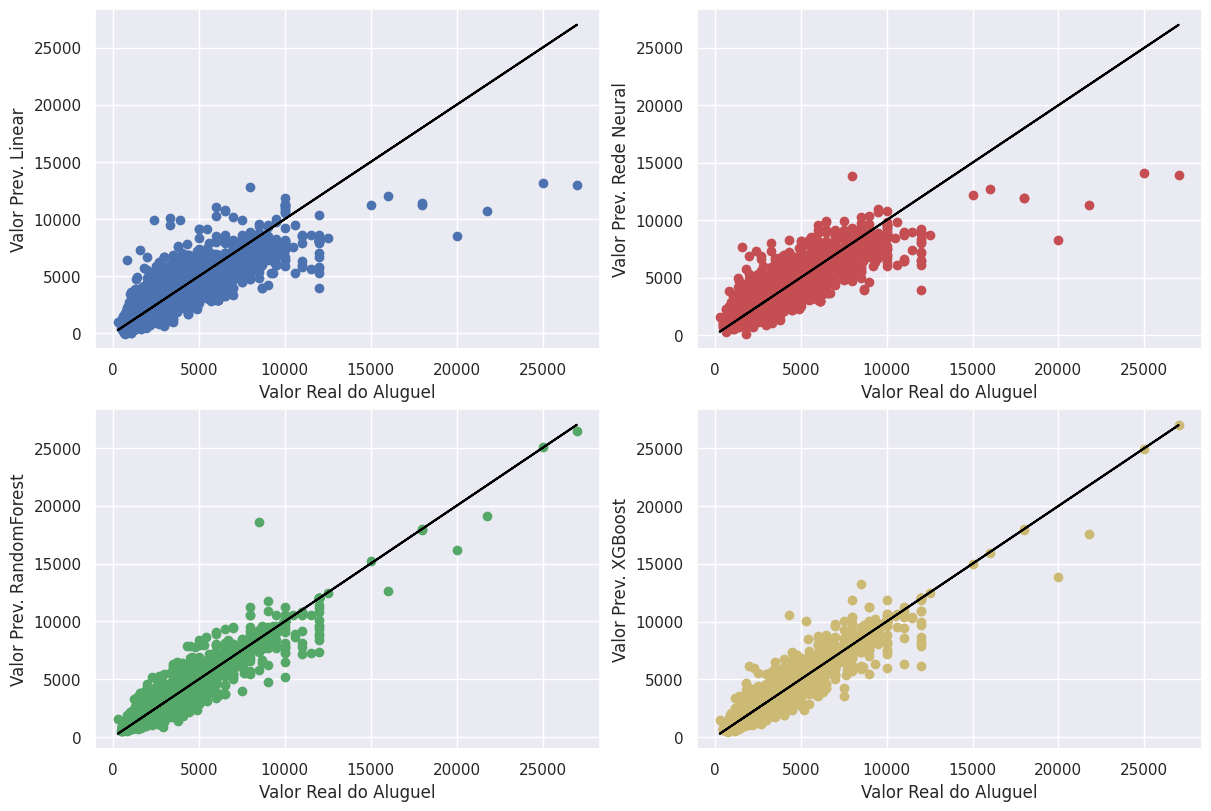

In [167]:
fig = plt.figure(figsize=(12, 8), layout="constrained")
spec = fig.add_gridspec(ncols=2, nrows=2)

ax1 = fig.add_subplot(spec[0,0])
ax1.scatter(test_pred['aluguel_real'], test_pred['aluguel_prev_linear'], label= 'Prev. Linear', c='b')
ax1.plot(test_pred['aluguel_real'], test_pred['aluguel_real'], c='black')
ax1.set_xlabel('Valor Real do Aluguel')
ax1.set_ylabel('Valor Prev. Linear')

ax2 = fig.add_subplot(spec[0,1])
ax2.scatter(test_pred['aluguel_real'], test_pred['aluguel_prev_rede'], c= 'r')
ax2.plot(test_pred['aluguel_real'], test_pred['aluguel_real'], c='black')
ax2.set_xlabel('Valor Real do Aluguel')
ax2.set_ylabel('Valor Prev. Rede Neural')

ax3 = fig.add_subplot(spec[1,0])
ax3.scatter(test_pred['aluguel_real'], test_pred['aluguel_prev_rf'], label= 'Prev. RandomForest', c='g')
ax3.plot(test_pred['aluguel_real'], test_pred['aluguel_real'], c='black')
ax3.set_xlabel('Valor Real do Aluguel')
ax3.set_ylabel('Valor Prev. RandomForest')

ax4 = fig.add_subplot(spec[1,1])
ax4.scatter(test_pred['aluguel_real'], test_pred['aluguel_prev_xgb'], label= 'Prev. XGBoost', c= 'y')
ax4.plot(test_pred['aluguel_real'], test_pred['aluguel_real'], c='black')
ax4.set_xlabel('Valor Real do Aluguel')
ax4.set_ylabel('Valor Prev. XGBoost')

plt.show()

### <font color="#800080"><b>OBS.:</b> Observa-se que há alguns pontos nos gráficos acima que apresentam um erro muito grande, mesmo nos gráficos dos modelos Random Forest e XGBoost. Provavelmente isso se deveu à presença dos Outliers que não removemos totalmente durante a limpeza dos dados. Isso sendo considerado, esses modelos, no geral, apresentaram resultados satisfatórios.</font>

# <b>6) Implementação da Função de Avaliação dos Imóveis para os Usuários da Ferramenta

## <font color="#800080">Nesta etapa, iremos gerar a ferramenta que de fato será utilizada pelos usuários que desejam estimar o valor do aluguel de determinado imóvel.</font>
### <font color="#800080">Espera-se que os usuários digitem os seguintes dados de entrada (7):
<li>Área do Imóvel;
<li>Nº de Quartos;
<li>Nº de vagas de garagem;
<li>CEP do imóvel;
<li>Nº de banheiros;
<li>Valor do Condomínio;
<li>Nº de suítes.</font>

### <font color="#800080">A ferramenta se encarregará de determinar as coordenadas geográficas a partir do nº do CEP do imóvel para ter os 8 parâmetros de entrada para o modelo de machine learning treinado. O modelo escolhido foi o RandomForestRegressor.</font>

### <font color="#800080">Em seguida, a ferramenta irá exibir o valor de aluguel sugerido, de acordo com os dados de entrada fornecidos.</font>








### <li><font color="#800080">Gerando uma função para obter as coordenadas a partir do CEP:</font>


In [177]:
url_cep2018_filt.head(3)

,cep,latitude,longitude
127622,12209000,-23.178073,-45.888701
127623,12209002,-23.177065,-45.886526
127624,12209003,-23.178079,-45.885866


In [212]:
# Função que retorna os valores de latitude e longitude para um CEP de São José dos Campos:
def cep_coord(cep):
  filtro = url_cep2018_filt[url_cep2018_filt['cep'] == cep]
  lat = filtro.at[filtro.index[0],'latitude']
  lon = filtro.at[filtro.index[0],'longitude']
  return lat, lon

In [215]:
# Testando a função:
w, k = cep_coord(12209002)
print (f'Latitude: {w}' + f' e Longitude:{k}')

Latitude: -23.177065 e Longitude:-45.8865258


### <li><font color="#800080">Gerando a função para estimar o valor do aluguel de um imóvel em SJC:</font>


In [217]:
# Lembrando do formato dos dados de entrada do modelo de Machine Learning treinado:
x_test.head(3)

,banheiros,bedrooms,suites,vagas_garagem,total_area,condominio,latitude,longitude
42071,2,3,1,2,92,480,-23.207257,-45.902702
48749,2,3,1,1,90,405,-23.246382,-45.914773
6561,1,1,0,0,44,261,-23.192018,-45.887899


In [244]:
def estimador(area,num_quartos,num_vagas,cep,num_banheiros,condominio,num_suites):
  lat, lon = cep_coord(cep)
  
  entrada = pd.DataFrame([[num_banheiros, num_quartos, num_suites, num_vagas, area, condominio, lat, lon]],
                         columns=['banheiros', 'bedrooms','suites', 'vagas_garagem','total_area', 'condominio','latitude','longitude'])
  print('\033[1m'+'Dados de entrada:'+'\033[0m')
  print(f'  Nº de quartos: {num_quartos:.0f};')
  print(f'  Nº de banheiros: {num_banheiros:.0f};')
  print(f'  Nº de suítes: {num_suites:.0f};')
  print(f'  Área: {area:.0f} m²;')
  print(f'  Valor do condomínio: R$ {condominio:.2f};')
  print(f'  CEP: {cep:.0f}.')
  print('\033[1m'+'Localização geográfica:'+'\033[0m')
  print(f'  Latitude: {lat}' + f' e Longitude:{lon}')
  print('')
  previsao_rf = rf_reg.predict(entrada)
  print('\033[1m'+'Valor do aluguel estimado:'+'\033[0m' f'R$ {previsao_rf[0]:.2f} (margem de erro de 15% para mais ou para menos)')


### <li><font color="#800080">Testando a função estimador para um dado hipotético:</font>


In [246]:
# Inserindo um dado hipotético:
estimador(100,2,2,12246002,2,700,1)

Dados de entrada:
  Nº de quartos: 2;
  Nº de banheiros: 2;
  Nº de suítes: 1;
  Área: 100 m²;
  Valor do condomínio: R$ 700.00;
  CEP: 12246002.
Localização geográfica:
  Latitude: -23.2122795 e Longitude:-45.905705

Valor do aluguel estimado:R$ 2516.47 (margem de erro de 15% para mais ou para menos)


### <li><font color="#800080">Avaliando 5 casos de dados reais, retirados de páginas de anúncios, com o estimador:</font>

In [247]:
# Testando com dados reais obtidos nos sites OLX ou ZAP Imóveis:

# Anúncio retirado do endereço: https://sp.olx.com.br/vale-do-paraiba-e-litoral-norte/imoveis/alugo-apto-jardim-aquarius-1187898632?lis=listing_1002
# Valor do aluguel no anúncio = R$ 2900,00
# Verificando com nosso estimador:
estimador(96,3,2,12246000,3,707,1)

Dados de entrada:
  Nº de quartos: 3;
  Nº de banheiros: 3;
  Nº de suítes: 1;
  Área: 96 m²;
  Valor do condomínio: R$ 707.00;
  CEP: 12246000.
Localização geográfica:
  Latitude: -23.2157491 e Longitude:-45.9061996

Valor do aluguel estimado:R$ 3837.15 (margem de erro de 15% para mais ou para menos)


<font color="#800080">OBS.: O estimador indicou que esse anúncio está uma barganha, pois está abaixo da margem de erro de 15% inferior, que seria R$ 3261,55.</font>

In [248]:
# Anúncio retirado do endereço: https://sp.olx.com.br/vale-do-paraiba-e-litoral-norte/imoveis/alugo-apartamento-2-quartos-jadim-america-1185189645?lis=listing_1002
# Valor do aluguel no anúncio = R$ 2100,00
# Verificando com nosso estimador:
estimador(62,2,2,12235070,2,490,1)

Dados de entrada:
  Nº de quartos: 2;
  Nº de banheiros: 2;
  Nº de suítes: 1;
  Área: 62 m²;
  Valor do condomínio: R$ 490.00;
  CEP: 12235070.
Localização geográfica:
  Latitude: -23.2316987 e Longitude:-45.8942739

Valor do aluguel estimado:R$ 1952.49 (margem de erro de 15% para mais ou para menos)


<font color="#800080">OBS.: O estimador indicou que esse anúncio está com valor dentro da média praticada no mercado.</font>

In [259]:
# Anúncio retirado do endereço: https://sp.olx.com.br/vale-do-paraiba-e-litoral-norte/imoveis/sao-jose-dos-campos-casa-de-condominio-portal-dos-passaros-1191786781?lis=listing_1002
# Valor do aluguel no anúncio = R$ 5000,00.
# Corrigido o CEP do anúncio para 12220710, pois estava errado.
# Considerado condomínio de R$ 1000,00, pois não estava no anúncio.
# Verificando com nosso estimador:
estimador(160,5,4,12220710,5,1000,5)

Dados de entrada:
  Nº de quartos: 5;
  Nº de banheiros: 5;
  Nº de suítes: 5;
  Área: 160 m²;
  Valor do condomínio: R$ 1000.00;
  CEP: 12220710.
Localização geográfica:
  Latitude: -23.1772968 e Longitude:-45.8484375

Valor do aluguel estimado:R$ 5371.79 (margem de erro de 15% para mais ou para menos)


<font color="#800080">OBS.: O estimador indicou que esse anúncio está com valor dentro da média praticada no mercado.</font>

In [260]:
# Anúncio retirado do endereço: https://sp.olx.com.br/vale-do-paraiba-e-litoral-norte/imoveis/apartamento-jardim-das-colinas-sp-1191785728?lis=listing_1002
# Valor do aluguel no anúncio = R$ 6500,00.
# Verificando com nosso estimador:
estimador(129,4,2,12242000,2,1300,1)

Dados de entrada:
  Nº de quartos: 4;
  Nº de banheiros: 2;
  Nº de suítes: 1;
  Área: 129 m²;
  Valor do condomínio: R$ 1300.00;
  CEP: 12242000.
Localização geográfica:
  Latitude: -23.207658 e Longitude:-45.9080975

Valor do aluguel estimado:R$ 5276.27 (margem de erro de 15% para mais ou para menos)


<font color="#800080">OBS.: O estimador indicou que esse anúncio está com valor acima da média praticada no mercado, acima da margem de erro de 15%, que seria R$ 6067,71. Nota-se que na descrição do anúncio é bastante valorizada a localização do imóvel, são citados vários pontos de interesse próximos como shoppings e supermercados.</font>

In [ ]:
# Anúncio retirado do endereço: https://sp.olx.com.br/vale-do-paraiba-e-litoral-norte/imoveis/apartamento-jardim-das-colinas-sp-1191785728?lis=listing_1002
# Valor do aluguel no anúncio = R$ 6500,00.
# Verificando com nosso estimador:
estimador(129,4,2,12242000,2,1300,1)